# 2022-06-29

## "머신러닝 필수요소정형데이터"</br>
## 탐색적데이터분석</br>
< 기술통계, 이상치, 필수시각화, 스케일링, 더미변수 ></br>

기술 통계

평균값 : 평균
중앙값(Blue) : 수치의 크기의 값을 정렬 시켜보면 위치적으로 중앙에 있는 값을 알 수 있는 데, 그 값을 중앙 값이라고 함
최빈값(Red) : 여러 수치 중에 가장 많이 존재하는 값

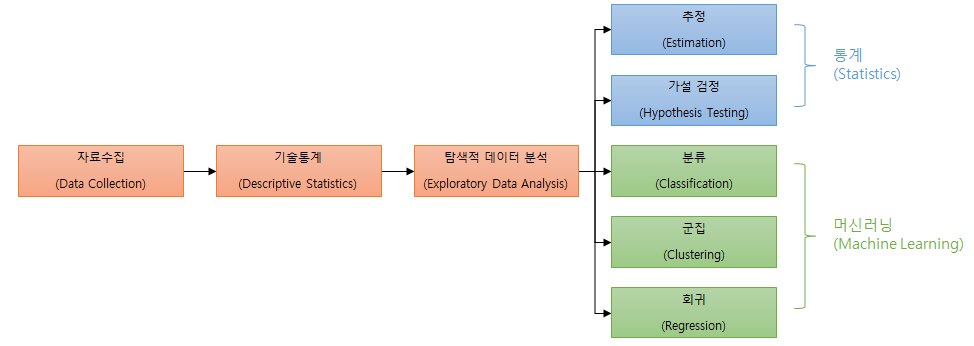

jpg 파일과 raw 파일이 다른이유</br>
jpg 파일은 컴퓨터와 기기에서 보기 좋게 압축한 형태 압축해서 성능이 향상</br>
raw파일은 카메라를 만드는 회사마다 다르며, 원본 그대로 저장한것</br>
가로가 6천 pixel이 넘는 경우가 많다.</br>
raw파일과 jpg 파일은 용량 차이가 많이 난다. 1/8 정도 차이</br>
연산이나 작업이 jpg로 많이 쓰인다.</br>
jpg = 디스플레이에서만 괜찮아 보이게 압축한다.</br>


png = 비손실 비트맵 이미지 포멧, 배경이 따로 있다.

4채널의 이미지를 jpg로 보내면 배열이 맞지 않아서 인공지능이 인식하기 힘들다.



In [5]:
from PIL import Image

import numpy as np

img = Image.open('png.png')
img = np.array(img)
np.shape(img) # (1193, 1470, 4)  채널이 4개라고 나온다. 이러한 경우 인공지능이 인식하기 어렵다. 마지막 채널은 알파채널이라고 부르고 배경

#img[0] #마지막에 0으로 들어가있는건 투명 배경, 255로 들어간것은 불투명한 배경

#png는 rgb-a 값 3채널에서 배경을 가지고 있는 4채널
#자료에 대한 포멧을 먼저 검사하고 자료로 쓸것을 권장

tmp = np.zeros((1193,1470,3))
#tmp

#img 자료 [x, x, x, x] tmp 자료는 [x, x, x]


#img 자료에서 rgb자료만 tmp에 저장
tmp [:,:,0] = img[:,:,0]
tmp [:,:,1] = img[:,:,1]
tmp [:,:,2] = img[:,:,2]


#과연 이렇게 만들었다고 png 파일을 jpg로 인식 할지?
tmp

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [6]:
img = Image.open('png_jpg.jpg')
img = np.array(img)
np.shape(img)

# 불러온 자료의 채널을 꼭 확인 할것, np.shape를 확인하고 3이 아니라면 rgb+@ 인것

(1193, 1470, 4)

In [ ]:
# 3채널이지만 jpg 파일이 아닌경우도 있기 때문에, 헤더 파일을 확인해야 한다.
# 파일의 확장자를 꼭 확인해야 한다,

In [14]:
# 헤더를 읽기 위해 파일을 열어 앞 16자리를 불러오고, hex 값으로 바꿔준다.

file = open('png.png','rb')
print(file.read(16))
m = file.read()

print(m[:16])
m[:16].hex()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR'
b'\x00\x00\x05\xbe\x00\x00\x04\xa9\x08\x06\x00\x00\x00\x10\xbf\x0f'


'000005be000004a9080600000010bf0f'

In [15]:
#jpg파일을 예시로 확인

file = open('flower.jpg','rb')
print(file.read(16))
m = file.read()

print(m[:16])
m[:16].hex()

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`'
b'\x00`\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01'


'00600000ffdb00430001010101010101'

#### 파일의 헤더를 확인해서 파일의 무결성을 확인한다.
#### 헤더 정보만으로 read가능한지 확인한다.
#### 헤더 정보를 확인하는 방법은 위 방법으로 해야 한다.
#### 파일을 열어서 read 앞 16자리가 헤더 이기 때문에 헤더를 확인 하여 읽을 수 있는정보인지 확인한다.

jpg 헤더의 16(0-15까지 표시 할 수 있는)진수 FF D8 FF E0는

16 진수 8자리는 2진수로 표현하면 8*4 해서 32자리가 표기됨


-----------------------------------------------------------------------------------------------------------------------

대량의 데이터중 몇개의 오류가 있어도 안되므로 정확한 헤더를 갖는 jpg 3채널로 모두 저장하고 작업하기도함.




## 머신러닝의 기초

히스토그램과 정규 분포에 대한 설명
회귀분석 - 은행권에서 많이 쓰이는 고전적인 분석 방법
빅데이터와 회귀분석과는 조금 많이 다르다.

하지만 굳이 고전적인 방법을 사용하지 않아도 된다.
데이터 갯수가 많아지게되면 고전적인 방법에 자원이 많이들고, 추천하지 않는다.

범주 변수 = 더미 변수</br>
(서로 다른 것으로 구분되는 변수)</br>
y = wx + b</br>

범주 변수로 넘아갈만한지 먼저 확인해봐야 한다.</br>
ex)성별 같은 경우, 상황값이 많지 않아서 굳이 넘어가지 않아도 된다.</br>
ex)성별 같은 경우 0,1 값만 가지고 있기 때문에 어렵다.</br>
ex)속한 값이 많은 경우 더미 변수로 만들어서 측정한다.</br>


파이썬 프로그램의 장점 이자 단점</br>
변수의 크기를 할당하지 않고 작업 가능하다.</br>
추후에 범주변수를 0이랑 1로 바꿔서 작업 하는것들</br>

각각의 자료를 연계하여 자료를 해석 해야 한다</br>

## 2. 도수분포표와 히스토그램

In [26]:
import numpy as np


blood = ['A', 'A', 'A', 'B', 'B', 'AB', 'O']

tmp = np.unique(blood, return_counts=True)
#return_counts = 카운트 갯수에 대해서 출력을 해주게 된다.
#type(tmp)

tmp = list(tmp)

tmp[0]
tmp.append(tmp[1]/np.sum(tmp[1])) # 전체 blood에서 유니크 값의 비율

tmp
#혈액형의 유니크값과, 혈액형의 명수, 총 혈액형에서 해당 혈액형의 비율

#array와 df 의 차이점은 넘파이, 

[array(['A', 'AB', 'B', 'O'], dtype='<U2'),
 array([3, 1, 2, 1], dtype=int64),
 array([0.42857143, 0.14285714, 0.28571429, 0.14285714])]

<BarContainer object of 4 artists>

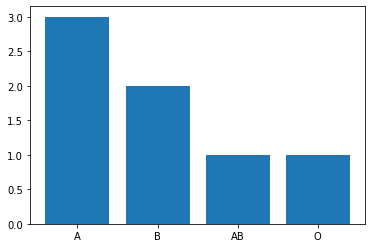

In [32]:
import pandas as pd
df = pd.Series(blood).value_counts()

import matplotlib.pyplot as plt
plt.bar(df.index, df)

In [35]:
!pip install seaborn

C:\Users\HP\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

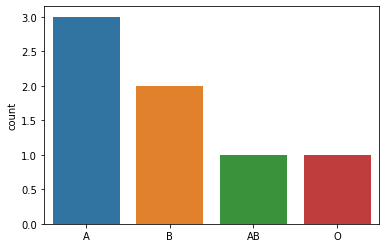

In [39]:
import seaborn as sns
sns.countplot(blood)


<AxesSubplot:>

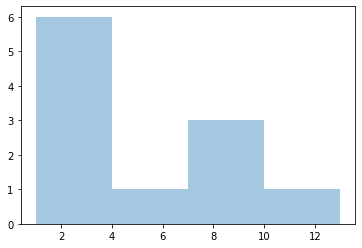

In [42]:
x = [1, 1, 1, 2, 3, 3.5, 5, 7, 8, 9, 13]
hist, edges = np.histogram(x, 4)
# len(x)
edges
hist
sns.distplot(x, bins=4, kde=False)

# 구간은 = (max - min) /bins  

알고리즘으로 작성 해보기!

<AxesSubplot:>

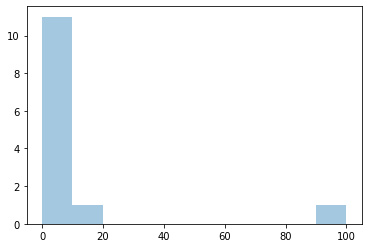

In [45]:
x = [1, 1, 1, 2, 3, 3.5, 5, 7, 8, 9, 13, 0, 100]
#최솟값과 최대값이 필요한경우, 앞 뒤로 추가 해줘도 되고 뒤에 한번에 추가 해도 된다.
#예) 현질 금액 같은 경우 무과금도 있기 때문에 최솟값과 최대값을 확실하게 정해줘야 한다.

hist, edges = np.histogram(x, 4)
edges
hist
sns.distplot(x, bins=10, kde=False)

히스토그램으로 어떤것을 알수 있는지</br>
-> 데이터의 분포도를 확인하기 위해서</br>
-> 작은 데이터수가 전체적인 데이터 수에 영향을 줄 수 있나?</br>
-> min max 값이 없다면 마지막에 추가해서 히스토그램을 그릴수 있다</br>

#### R은 시각화와 통계에 특화되어있는 프로그램
#### Python은 잡다하게 사용할 수 있는 프로그램
#### python은 시각화부분에서 많이 부족할 수 있다.
#### R의 라이브러리를 가져와서 쓴다.
#### subplot 같은것도 R이 더 빠르다.

※ 경고 문구가 싫은 경우 -주피터 노트북에서 경고 명령 숨기는 명령어가 있음, 그거 사용

히스토그램을 통해 얻어낼 수 있는 자료</br>
유저의 현질 정도를 0~90 까지 봤을때

0~99999원까지 얼마나 많은 유저가 현질을 했는가

히스토그램이 한쪽으로 몰려있는경우 (ex - 0~99999원 현질 유저가 많은 경우)

초과금 유저가 적은 경우, 데이터의 75%의 값과 max값과 차이가 날때는 max값을 무시한다.

데이터가 어디에 쏠려 있는지가 왜 중요한가?

데이터는 패턴이 있어야 하며, 패턴을 확인 하기 위해 히스토그램으로 확인해본다.

## 데이터 분석
- 패턴이 있는 자료(정규분포인가)(데이터갯수가 작을때: 예 10만건, 가설검증(귀무가설, 대립가설), pvalue를 함)
- 빅데이터(히스토그램으로 대강봄)
- 에서 기존자료의 패턴을 예측하거나 분류해서
- 미래 데이터에 적용하는것



(array([  8.,  27.,  58., 106., 123.,  97.,  49.,  26.,   4.,   2.]),
 array([-2.76774483, -2.14470316, -1.5216615 , -0.89861984, -0.27557817,
         0.34746349,  0.97050515,  1.59354681,  2.21658848,  2.83963014,
         3.4626718 ]),
 <BarContainer object of 10 artists>)

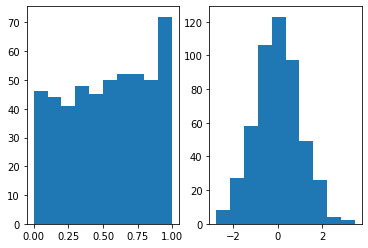

In [58]:
##랜덤함수에 정규분포 난수를 발생

import numpy as np

a = np.random.rand(500) # 일반 난수 발생 
b = np.random.standard_normal(500) #표준정규분포 난수 발생기


#표준정규분포 평균은 0에 가깝게 편차는 1에 가깝게
np.mean(a), np.std(a), np.mean(b), np.std(b)

plt.subplot(1,2,1)
plt.hist(a)
plt.subplot(1,2,2)
plt.hist(b)

# 일반 난수 생성은 랜덤이지만 표준 정규 분포 랜덤 발생은 정규분포형식을 띈다.
# random.normal() 함수는 정규 분포로부터 얻은 임의의 샘플을 반환

경기도 광주시에는 호흡기 환자가 많다.

원인 : 광주의 대기 상태가 나쁠것이다.
원인 : 나이로 구분
원인 : 광주에 호흡기 전문 병원이 많다.(0)

데이터 분석을 할때 눈에 보이지 않는것까지 찾아내야 한다.



건희는 학교에서 꼴등이다.
그래서 학원을 보냈더니 성적이 올랐다.
이유는?

학원에서 대신 자서 학교에서 잠을 안자게 되었다.


고객 분석 = 남녀 분석

날짜가 들어간 시계열 분석은 그룹을 만들어서 분석 해야 한다.

R = 최근성
F = 구매 빈도
M = 구매 금액

고객유형 분류를 통해 - VIP, 잠재VIP, 일반, 이탈
4분기에는 신규채용이 많지 않아서 매출이 떨어진게 아닐까??


향상도가 1 이상인 제품들이 판매 시너지를 발휘하는 제품들

넷플릭스 추천 알고리즘 오픈소스

word to vector => 문자를 숫자로 바꾼다
카운트 기반하여 벤터로 만드는 기법이 있다.
여러가지 방법들이 존재, 이것을 통해 연관성 분석이 가능
수학공식은 어렵기 때문에 권장 하진 않음



복원추출(sampling with replacement)이란 추출하였던 것을 제자리에 돌려놓고 다음 것을 추출하는 방법이다. 

비복원추출(sampling without replacement)은 추출한 것을 제자리에 되돌리지 않고 다음 것을 추출하는 방법

In [164]:
# 모수, 비모수 추출 = 복원추출, 비복원 추출

#정규 분포 : 무작위로 뽑아서 평균을 계산 했을때 기존의 평균과 비슷

import numpy as np

count = 32
b = list(np.arange(count))
caNum=[]


for cnt in range(count):
    tmp = int(np.random.rand()*(count-cnt))
    caNum.append(b[tmp])
    b.pop(tmp)

    
    
np.unique(caNum, return_counts=True)





    


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [ ]:
a=[10,20,30,40]
#추출 했더니 3번재 자리 값이 나와서 캐비넷 넘버 1번에 30을 append
#추출 후에는 추출된 자리의 값을 없애줘야 한다.

a = [10,20,40]
#추출 했더니 2번재 자리 값이 나와서 캐비넷 넘버 2번에 20을 append
#추출 후에는 추출된 자리의 값을 없애줘야 한다.



In [91]:
int(np.random.rand()*32)

28

In [173]:
tmp = np.zeros(36)
tmp[4:]=caNum[:32]
np.reshape(tmp,(4,9))

array([[ 0.,  0.,  0.,  0., 27.,  2.,  6., 18.,  8.],
       [26., 21.,  5., 25., 16., 10., 17.,  7., 28.],
       [ 0., 22.,  9.,  4., 29., 23., 14., 31., 24.],
       [19., 11., 30., 15., 13.,  1.,  3., 20., 12.]])

In [192]:
#인덱싱을 잘해야 한다.

a = np.array([2,4,5,1,2,1,1])
bumList=[]


for x in range(5):
    bum = int(np.random.rand()*7)
    if bum not in bumList:
        bumList.append(bum)
        
a[bumList]

array([1, 1, 4, 1, 2])

## 주식은 강화 학습 같은것들로 진행한다.

## 중간값, 평균, 최빈값

- 평균(mean): 자료의 합을 자료의 갯수로 나눈 값
- 평균은 극단적인 값(outliers)의 영향을 잘 받는다.


- 중간값(median): 자료를 크기 순으로 정렬했을 때 정 가운데에 있는 값
- 자료의 상위 50%와 하위 50%를 가르는 지점
- '중앙값' 또는 '중위수'라고도 한다.
- 짝수냐 홀수냐에 따라 달라진다. python에서는 홀수갯수일때는 /2, 짝수일 경우에는
- 나눠서 앞뒤로 하나
- 파이썬에서는 np.median로 사용가능하다.
- 데이터가 짝수 개일 경우에는 가운데 두 값의 평균
- 자료를 크기 순으로 정렬할 수만 있으면 되므로 서열척도/등간척도/비율척도에서 쓸 수 있다. 명명척도에서는 쓸 수 없다.


- 최빈값(mode): 가장 빈번하게 관찰/측정되는 값


- python의 모듈을 사용해야 자원을 아껴서 사용할 수 있다.
- python의 scipy.stats 는 수학 모듈만 모아놓은 모듈

In [205]:
#최빈값에 해당하는 내용

a = [0,1,2,3,1,1,1,2,1,1,1,2,1,1,1,1,2,1,1,1,1]
re = np.unique(a, return_counts=True)

num = list(re[1]).index(np.max(re[1]))
re[0][num]

#type(re[1])

#re.index(list(np.max(re[1])))

#np.max(re[1])
#re[1][1]


1

In [203]:
re[1] #2
re[0][1]

1

In [207]:
from scipy.stats import mode

mode(a) #가장 출현 빈도가 높은 번호, index번호

ModeResult(mode=array([1]), count=array([15]))

### 분산성 측정치 (분산, 표준편차, 범위, 사분위간 범위)

- 데이터의 퍼짐 정도
- 편차(평균과 값의 차이) x - x^
- 분산(평균과 값의 차이를 제곱한 자료의 합) 
- 정 가운데 중앙 집중형 데이터가 가장 좋은것
- 평균 데이터와 떨어져 있는 데이터는 고민을 해야 된다.
- 분산성, 평균을 기반해서 얼마나 펴저있는지
- 문제는 분산을 척도를 구하는 명령에는 모집단과 표본집단 두개가 들어간다.


- 변산성(variability): 자료가 흩어져 있는 정도, 혹은 개체에 따라 변할 수 있는 정도
- 중심경향치가 자료가 무엇을 중심으로 모여있는가(혹은 흩어져 있는가)를 나타내는 것이라면,
- 변산성 측정치는, 그 모여있는 정도(혹은 흩어져 있는 정도)를 의미함


#### 분산

- 평균에서 데이터가 벗어난 정도를 수치화한 값
- 각각의 데이터에서 평균값을 빼고, 그것을 제곱하여 평균을 구함

- 분산이 크면 : 데이터가 평균에서 많이 벗어나 있다

- 분산이 작으면 : 데이터가 평균 주변에 모여 있다


#### 표준편차

- 평균에서 데이터가 벗어난 정도를 수치화한 값
- 표준편차(분산 **0.5 또는 루트(분산)) // 값이 너무 커서 줄이는것

In [210]:
a=[20,10,20,20]

np.mean(a), np.var(a, ddof=0), np.std(a), np.var(a)**0.5

#var( ddof=0) = 
#**0.5 == 루트씌워주는것
#분산과 표준편차에서 0이 나오면 스케일링을 통해 바꿔줘야 하는데
#데이터의 변동성이 없는 자료는 계산(스케일링)을 해줄수가 없다.
#상관계수에도 

(17.5, 18.75, 4.330127018922194, 4.330127018922194)

In [211]:
a = [1, 27, 2, 40]

np.mean(a), np.var(a, ddof=0), np.std(a), np.var(a)**0.5

# 위 값과 비교해주면 분산이나 표준편차에서 크기가 생긴다.


(17.5, 277.25, 16.650825805346713, 16.650825805346713)

In [ ]:
# 모집단(n개), 표본집단(n-1개)에 대해서 알고 가야 한다.
# var, std 사용시 // numpy - 모집단 기본, pandas - 표본집단 기본
# ddof 옵션에서 모집단, 표본집단 선택 가능함


In [ ]:
#numpy.quantile(x, .75) - numpy.quantile(x, .25)
# 넘파이의 사분위간 범위



#### 변산성 측정치를 이용한 이상점 진단

- 대부분의 자료는 중심경향치 주변에 몰려있음
- 변산성 측정치를 기준으로 벗어난 정도를 파악할 수 있음
  - 평균에서 벗어난 정도를 판단할 때는 표준편차를 사용
    - 평균에서 표준편차의 n배 떨어져 있으면 "n 표준편차"와 같이 표현
  - 중간값에서 벗어난 정도를 판단할 때는 IQR을 사용
- 중심경향치에서 크게 벗어났다면 이상점으로 의심할 수 있음

In [212]:
# 모집단(n개), 표본집단(n-1개)에 대해서 알고 가야 한다.
# var, std 사용시 // numpy - 모집단 기본, pandas - 표본집단 기본
# ddof 옵션에서 모집단, 표본집단 선택 가능함

a = [2,2,4,8]

print(sum((a - np.mean(a))**2)/4, np.var(a))
print(sum((a-np.mean(a))**2)/3, np.var(a, ddof =1))

6.0 6.0
8.0 8.0


In [214]:
import pandas as pd

df = pd.DataFrame({'data':a})
df['data'].var(), df['data'].var(ddof=0)

(8.0, 6.0)

var 에서 ddof = 0 은 모집단, ddof = 1 은 표본집단</br>
np.var은 ddof = 0 이 기본/ pandas 에서는 ddof =1 이 기본</br>
참고 : n개에서 n-1,n-2, n-3 하는 작업을 자유도 라고함</br>
ex ) 19개의 자유도 ( 20개 -1)</br>

In [215]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ac94d45aa4587f284bf56f6767e6a406bc0a4b063cdc7e89f564e5e3b2ee4f1a
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [216]:
#Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

mMscaler = MinMaxScaler()
mMscaler.fit(numeric_data)

mMscaled_data = mMscaler.transform(numeric_data)
mMscaled_data = pd.DataFrame(mMscaled_data)

NameError: name 'numeric_data' is not defined

In [ ]:
#Standard Scaling


from sklearn.preprocessing import StandardScaler
# StandardScaler 선언 및 Fitting
sdscaler = StandardScaler()
sdscaler.fit(numeric_data)

# 데이터 변환
sdscaled_data = sdscaler.transform(numeric_data)

# 데이터 프레임으로 저장
sdscaled_data = pd.DataFrame(sdscaled_data)



In [226]:
from sklearn.preprocessing import MinMaxScaler

train = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
test = [[10,20],[100,200]]
scaler = MinMaxScaler()

# print(scaler.fit(data)) # fit 
# print(scaler.data_max_)
# print(scaler.data_min_)

#print('-'*50)

print(scaler.fit_transform(train))
print('-'*50)
print(scaler.transform(test))
#fit은 정보만 얻는다, 유니크값만 갖는다.

#딥러닝에서는 말고 머신러닝에서만 확인해주면된다. # test 자료는 스케일러를 하지 않는다.
#피팅은 정보만 추출한다. 데이터의 변환이 이루어 지진 않음
#트레이닝 데이터의  min max mean 값만 있으면 된다.

[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
--------------------------------------------------
[[ 5.5    1.125]
 [50.5   12.375]]


In [227]:
train = [[0, 1], [0, 1], [0, 1], [0, 1]]
test = [[10,20],[100,200]]
scaler = MinMaxScaler()

# print(scaler.fit(data)) # fit 
# print(scaler.data_max_)
# print(scaler.data_min_)

#print('-'*50)

print(scaler.fit_transform(train))
print('-'*50)
print(scaler.transform(test))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
--------------------------------------------------
[[ 10.  19.]
 [100. 199.]]


In [228]:
from sklearn.preprocessing import StandardScaler

train = [[0,1],[1,1],[0,0],[0,0]]
scaler = StandardScaler()
print(scaler.fit_transform(train))

# 0과 1의 격차에서 격차가 더 심해짐
# 0과 1로 이루어진 데이터셋에서는 standardscaler를 쓰지 말것



[[-0.57735027  1.        ]
 [ 1.73205081  1.        ]
 [-0.57735027 -1.        ]
 [-0.57735027 -1.        ]]


In [245]:
x = pd.DataFrame({'지역':['서울','서울','부산','제주','제주'],
                 '호감도':[1,2,3,4,4],
                 '성별':['여','여','남','남','여']})
x

# x데이터 일때 바꾸는 방법과 y 데이터 일때 바꾸는 방법이 다르다.
# 서울 , 부산 , 제주 3개의 변수를 만들고
# 그 변수에 맞게 핏팅 하는것

a = x[['호감도','성별']]
b = pd.get_dummies(x['지역'])
#숫자는 더미에 영향을 받지 않는다.
df1 = pd.concat([a,b], axis = 1)



,호감도,성별,부산,서울,제주
0,1,여,0,1,0
1,2,여,0,1,0
2,3,남,1,0,0
3,4,남,0,0,1
4,4,여,0,0,1


In [242]:
x[['호감도','성별']]

,호감도,성별
0,1,여
1,2,여
2,3,남
3,4,남
4,4,여


In [243]:
pd.get_dummies(x['지역'])

,부산,서울,제주
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,0,1


In [247]:
# 더미 변수가 많이 생성되는 문자 피처가 많은 data는
# 레벨 인코더 가지만 하고 (더미변수화 안함) 라쏘 모델을 사용함

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df1['성별'])
encoder.classes_
# 핏팅은 정보를 만들어 내는 과정,
labels = encoder.transform(df1['성별'])
df1['성별'] =labels
df1

#다양한 부분이 있지만, 핏팅에 대한 개념을 알려주려고 쓰신것
#정보를 가져와서 처리하는게 트랜스폼
#fir_transform 으로 처리해도된다.


,호감도,성별,부산,서울,제주
0,1,1,0,1,0
1,2,1,0,1,0
2,3,0,1,0,0
3,4,0,0,0,1
4,4,1,0,0,1


## 데이터 전처리 과정에서 스케일링은 왜 해야 할까요??

- 수치형 변수의 크기(단위)가 변수마다 다르다면 종속 변수에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.
- 이를 해결하기 위해 모든 변수의 범위를 조절해주는 과정이 스케일링입니다.
- 스케일링은 분포의 모양을 바꿔주진 않습니다.


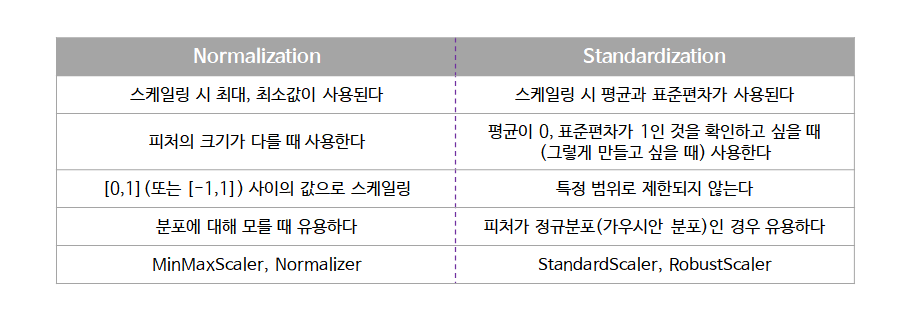

# 레이블 인코딩, 정규분포, 오늘 배운것들은 복습